In [26]:
import pandas as pd
import numpy as np
#Loading dataset
df=pd.read_csv('telecom_dataset.csv')
print(df.head())
print(df.info())

   tenure  monthly_charges  total_charges   contract_type  \
0      52            99.53        5175.38        One year   
1      15            20.89         313.29        One year   
2      61            78.41        4783.25  Month-to-month   
3      21            65.74        1380.61        Two year   
4      24            54.72        1313.38  Month-to-month   

   customer_support_calls internet_service online_security tech_support  \
0                       4      Fiber optic              No           No   
1                       6              DSL              No          Yes   
2                       4      Fiber optic             Yes           No   
3                       5               No             Yes          Yes   
4                       8              DSL             Yes           No   

     payment_method paperless_billing  churn  
0      Mailed check               Yes      1  
1      Mailed check               Yes      1  
2      Mailed check               Yes    

In [27]:
#Checking overall information
print(df.describe())

            tenure  monthly_charges  total_charges  customer_support_calls  \
count  5000.000000      5000.000000    5000.000000             5000.000000   
mean     35.850800        59.925082    2155.166596                4.477400   
std      20.326839        23.084262    1549.755819                2.884086   
min       1.000000        20.050000      20.070000                0.000000   
25%      18.000000        40.380000     879.935000                2.000000   
50%      36.000000        60.205000    1826.090000                5.000000   
75%      54.000000        79.792500    3167.820000                7.000000   
max      71.000000        99.990000    7023.020000                9.000000   

             churn  
count  5000.000000  
mean      0.772200  
std       0.419455  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  


In [28]:
#Checking null values
print(df.isnull().sum())

tenure                    0
monthly_charges           0
total_charges             0
contract_type             0
customer_support_calls    0
internet_service          0
online_security           0
tech_support              0
payment_method            0
paperless_billing         0
churn                     0
dtype: int64


In [29]:
#Checking duplicates
print(df.duplicated().sum())

0


In [30]:
#Removing outliers
numerical_cols=['tenure','monthly_charges','total_charges']
def remove_outliers(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
    return df

df=remove_outliers(df,numerical_cols)

In [31]:
#Checking shape after removing outlier
df.shape

(4984, 11)

In [32]:
#Encoding with ordinal encoding to check the correlation between each columns
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()
df['contract_type']=ord_enc.fit_transform(df[['contract_type']])
df['internet_service']=ord_enc.fit_transform(df[['internet_service']])
df['online_security']=ord_enc.fit_transform(df[['online_security']])
df['tech_support']=ord_enc.fit_transform(df[['tech_support']])
df['payment_method']=ord_enc.fit_transform(df[['payment_method']])
df['paperless_billing']=ord_enc.fit_transform(df[['paperless_billing']])

In [33]:
#Checking if every columns are converted into numerical_columns for correlation
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4984 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tenure                  4984 non-null   int64  
 1   monthly_charges         4984 non-null   float64
 2   total_charges           4984 non-null   float64
 3   contract_type           4984 non-null   float64
 4   customer_support_calls  4984 non-null   int64  
 5   internet_service        4984 non-null   float64
 6   online_security         4984 non-null   float64
 7   tech_support            4984 non-null   float64
 8   payment_method          4984 non-null   float64
 9   paperless_billing       4984 non-null   float64
 10  churn                   4984 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 467.2 KB


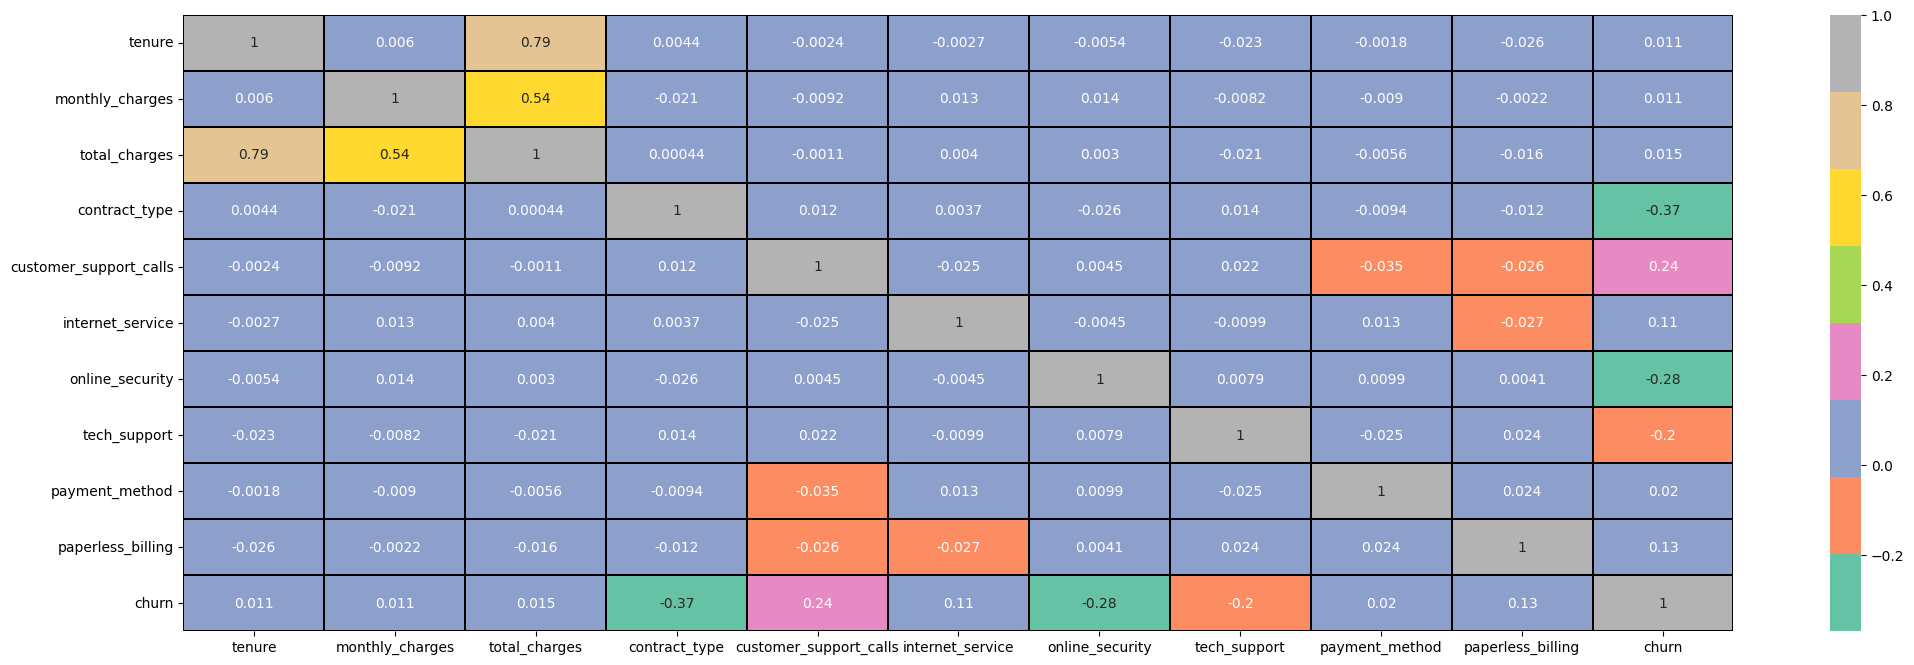

In [34]:
#Making the correlation figure for better understanding
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,8))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='Set2', linewidths=0.01, linecolor="black")
plt.show()

In [35]:
#Dropping column total charge as tenure and monthly charge has it's value already
df.drop(columns=['total_charges'],inplace=True)

In [36]:
#Supervised learning
from sklearn.model_selection import train_test_split
X=df.drop(columns=['churn'])
Y=df['churn']

In [37]:
#splitting dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=42)

In [38]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [39]:
#saving scaler for streamlit usage
import pickle as pk
scaler_filename='scaler.pickle'
pk.dump(scaler,open(scaler_filename,'wb'))

In [40]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
lgr=LogisticRegression(class_weight='balanced')
lgr_model=lgr.fit(X_train,Y_train)
Y_pred_lgr=lgr_model.predict(X_test)
lgr_accuracy=round(accuracy_score(Y_test,Y_pred_lgr),2)
lgr_precision=round(precision_score(Y_test,Y_pred_lgr),2)
lgr_recall=round(recall_score(Y_test,Y_pred_lgr),2)
lgr_f1=round(f1_score(Y_test,Y_pred_lgr),2)

print(f'The accuracy score on logistic regression is {lgr_accuracy}')
print(f'The precision score on logistic regression is {lgr_precision}')
print(f'The recall score on logistic regression is {lgr_recall}')
print(f'The f1 score on logistic regression is {lgr_f1}')


The accuracy score on logistic regression is 0.79
The precision score on logistic regression is 0.92
The recall score on logistic regression is 0.79
The f1 score on logistic regression is 0.85


In [41]:
#train acc
print("Train acc of Logistic regression = ",round(lgr_model.score(X_train, Y_train)*100))
#test acc
print("Test acc of Logistic regression = ",round(lgr_model.score(X_test, Y_test)*100))

Train acc of Logistic regression =  82
Test acc of Logistic regression =  79


In [42]:
#SVM
from sklearn.svm import SVC
svm=SVC(C=1,kernel='rbf',class_weight='balanced',gamma=0.01,probability=True)
svm_model=svm.fit(X_train,Y_train)
Y_pred_svm=svm_model.predict(X_test)
svm_accuracy=round(accuracy_score(Y_test,Y_pred_svm),2)
svm_precision=round(precision_score(Y_test,Y_pred_svm),2)
svm_recall=round(recall_score(Y_test,Y_pred_svm),2)
svm_f1=round(f1_score(Y_test,Y_pred_svm),2)

print(f'The accuracy score on svm is {svm_accuracy}')
print(f'The precision score on svm is {svm_precision}')
print(f'The recall score on svm is {svm_recall}')
print(f'The f1 score on svm is {svm_f1}')

The accuracy score on svm is 0.81
The precision score on svm is 0.94
The recall score on svm is 0.8
The f1 score on svm is 0.86


In [43]:
#train acc
print("Train accuracy of SVM = ",round(svm_model.score(X_train, Y_train)*100))
#test acc
print("Test accuracy of SVM= ",round(svm_model.score(X_test, Y_test)*100))

Train accuracy of SVM =  83
Test accuracy of SVM=  81


In [44]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
KNN=KNeighborsClassifier()
KNN_model=KNN.fit(X_train,Y_train)
Y_pred_KNN=KNN_model.predict(X_test)

KNN_accuracy=round(accuracy_score(Y_test,Y_pred_KNN),2)
mean_error=round(mean_squared_error(Y_test,Y_pred_KNN),2)
print(f'The accuracy score on KNN is {KNN_accuracy}')
print(f'The MSE on KNN is {mean_error}')

The accuracy score on KNN is 0.85
The MSE on KNN is 0.15


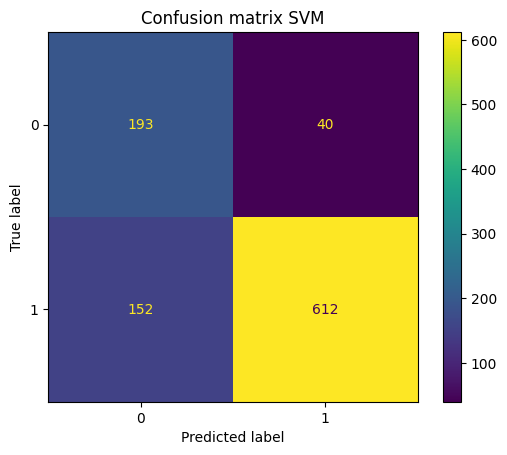

In [45]:
#Confusion matrix of SVM
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm_svm=confusion_matrix(Y_test,Y_pred_svm)
dis_svm=ConfusionMatrixDisplay(confusion_matrix=cm_svm)
dis_svm.plot()
plt.title('Confusion matrix SVM')
plt.show()


##### Since SVM model has highest accuracy,precision,f1 score and recall we choose svm model to deploy.

In [46]:
#Dumping model
import pickle as pk
filename='telecom.pickle'
pk.dump(svm_model,open(filename,'wb'))